In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 6us/step


In [2]:
import numpy as np
def normalize(x, xtest, axis = 0):
    m = np.mean(x, axis = axis)
    meanCentred = x-m
    meanCentredTest = xtest - m
    sigma = np.std(x, axis = axis)
    return [meanCentred/sigma, meanCentredTest/sigma]
[x,xTest] = normalize(train_data, test_data)

In [14]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse' , metrics = ['mae'])
    return model

        

In [23]:
k = 5
num_val_samples = len(x)//k
num_epochs = 200
all_scores = []
all_mae_histories = []
for i in range(k):
    print("fold ",i)
    val_data = x[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    xt = np.concatenate([x[:i*num_val_samples], x[(i+1)*num_val_samples:]], axis = 0)
    yt = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]], axis=0)
    model = build_model()
    hist = model.fit(xt,yt, epochs = num_epochs, batch_size = 1, verbose = 0)
    mae_history = hist.history['mean_absolute_error']
    all_mae_histories.append(mae_history)
    

fold  0
fold  1
fold  2
fold  3
fold  4


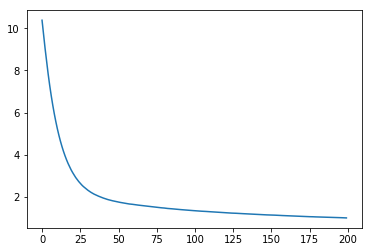

In [39]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for pt in points:
        if smoothed_points:
            prev = smoothed_points[-1]
            smoothed_points.append(prev*factor + pt*(1-factor))
        else:
            smoothed_points.append(pt)
    return smoothed_points
average_mae_hist = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
smooth_hist = smooth_curve(average_mae_hist)
plt.plot(smooth_hist[:])
plt.show()